# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
SalesData = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')
SalesData.reset_index(drop=True, inplace=True)

In [5]:
# import CSV file entitled "SalesData.csv"
SalesData.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
SalesData.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
SalesData.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

Text(0.5, 1.0, 'Scatter of Temperature and Revenue')

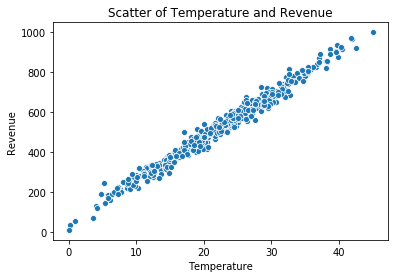

In [9]:
sns.scatterplot(SalesData['Temperature'], SalesData['Revenue'])
plt.title('Scatter of Temperature and Revenue')

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [0]:
X_train = SalesData['Temperature']
y_train = SalesData['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [11]:
X_train.shape

(500,)

In [12]:
y_train.shape

(500,)

In [13]:
model_sales = tf.keras.Sequential()
model_sales.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model_sales.add(tf.keras.layers.Dense(units=1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model_sales.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sales.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [16]:
epochs_hist = model_sales.fit(X_train, y_train, epochs = 1000 )

Epoch 1/1000
500/500 [==============================] - 4s 8ms/sample - loss: 66346.0300
Epoch 2/1000
500/500 [==============================] - 0s 85us/sample - loss: 5474.0425
Epoch 3/1000
500/500 [==============================] - 0s 83us/sample - loss: 1577.2273
Epoch 4/1000
500/500 [==============================] - 0s 85us/sample - loss: 765.2640
Epoch 5/1000
500/500 [==============================] - 0s 89us/sample - loss: 683.0332
Epoch 6/1000
500/500 [==============================] - 0s 88us/sample - loss: 661.2733
Epoch 7/1000
500/500 [==============================] - 0s 78us/sample - loss: 646.5684
Epoch 8/1000
500/500 [==============================] - 0s 89us/sample - loss: 701.4634
Epoch 9/1000
500/500 [==============================] - 0s 92us/sample - loss: 705.5747
Epoch 10/1000
500/500 [==============================] - 0s 80us/sample - loss: 685.3460
Epoch 11/1000
500/500 [==============================] - 0s 84us/sample - loss: 748.3147
Epoch 12/1000
500/500 [====

# STEP#5: EVALUATE THE MODEL 

In [17]:
epochs_hist.history.keys()

dict_keys(['loss'])

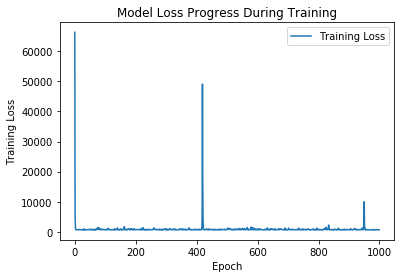

In [18]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [19]:
model_sales.get_weights()

[array([[-0.05636611, -0.05801179, -4.7608957 , -0.03246625, -0.04961877,
         -0.07588808,  0.09061816, -0.00900389,  0.10372125,  0.04784142]],
       dtype=float32),
 array([ 1.4026608,  1.4367944,  4.4425797,  0.8093899,  1.2332951,
         1.8827314, -2.2502084,  0.2181733, -2.5793855, -1.1858991],
       dtype=float32),
 array([[ 4.7222059e-03],
        [-9.0554042e-04],
        [-4.4622002e+00],
        [ 9.1451220e-03],
        [ 3.3580130e-03],
        [ 2.0355154e-03],
        [-3.6582928e-03],
        [-5.4658006e-04],
        [-7.2870790e-03],
        [-1.7617934e-04]], dtype=float32),
 array([64.83513], dtype=float32)]

In [20]:
# Use the trained model to perform predictions
Temperature = 24
Revenue = model_sales.predict([Temperature])
print('Revenue Predictions Using Trained ANN =', Revenue)


Revenue Predictions Using Trained ANN = [[554.8708]]


In [21]:
data = {'Temperature': range(1,46)} 
  
# Convert the dictionary into DataFrame 
df_prediction = pd.DataFrame(data) 
df_prediction.head(5)



,Temperature
0,1
1,2
2,3
3,4
4,5


In [22]:
#adding the column 'Revenue'
df_prediction['Revenue'] = 0
df_prediction.head(5)


,Temperature,Revenue
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
#for x in df_prediction['Temperature']:
#  y = model_sales.predict(x)

Text(0, 0.5, 'Revenue [dollars]')

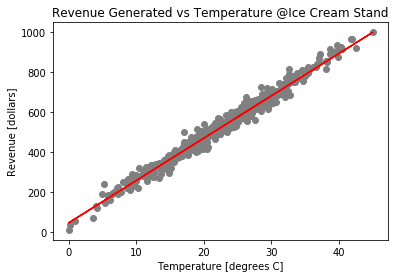

In [28]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model_sales.predict(X_train), color='red')
plt.title('Revenue Generated vs Temperature @Ice Cream Stand')
plt.xlabel('Temperature [degrees C]')
plt.ylabel('Revenue [dollars]')

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [0]:
X_train = X_train.values.reshape(-1,1)



In [30]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [34]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coefficient (m) [[23.22442357]]
Linear Model Coeff (b) 0.0


Text(0.5, 1.0, 'Revenue generated in SKLEARN')

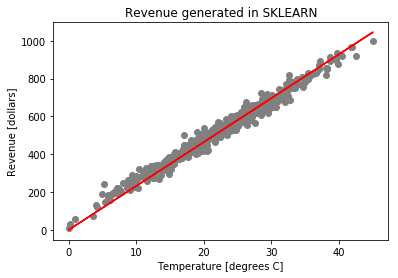

In [36]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degrees C]')
plt.title('Revenue generated in SKLEARN')


# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR SECOND NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB! 